<a href="https://colab.research.google.com/github/Mike030668/team-UII/blob/main/%D0%A2%D0%B5%D1%81%D1%82_%D0%B2_%D0%BA%D0%BE%D0%BC%D0%B0%D0%BD%D0%B4%D1%83_%D0%A3%D0%98%D0%98_%D0%BD%D0%B0_predict_%D0%90%D0%A1_%D1%84%D0%B8%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python

In [2]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont # Модули работы с изображениями
import time
from IPython.display import clear_output

# Загрузка модели с HTML

In [23]:
import gdown
from keras.models import load_model 

file_id = '1--zzp2MySvcwnMSQh2mAJFra49e07Pnd'
gdown.download('https://drive.google.com/uc?id=' + file_id, 'model5.h5', quiet=False)

train_model = load_model('/content/model5.h5')

# загрузка модели

Downloading...
From: https://drive.google.com/uc?id=1--zzp2MySvcwnMSQh2mAJFra49e07Pnd
To: /content/model5.h5
80.4MB [00:02, 38.2MB/s]


In [24]:
train_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
model (Functional)           [(None, 32, 32, 32), (Non 6603236   
_________________________________________________________________
model_1 (Functional)         (None, 128, 128, 3)       81859     
Total params: 6,685,095
Trainable params: 6,684,455
Non-trainable params: 640
_________________________________________________________________


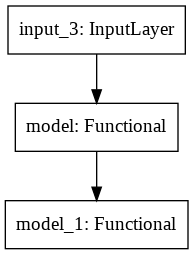

In [25]:
from tensorflow.keras.utils import plot_model #модуль отрисоки структуры нейронки
plot_model(train_model)

# MSE

In [26]:
# создадим функцию среднеквадратичной ошибки
def getMSEmasive(x1, x2): 
  return np.square(np.subtract(x1, x2)) # и возвращаем сумму квадратов разницы, делённую на длину разницы

# Загрузка видео с HTML

In [8]:
import gdown

file_id = '1ETKBfNoXO8Kafr8Kn1tbzozb94ygRI41'
gdown.download('https://drive.google.com/uc?id=' + file_id, 'test_video.mp4', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1ETKBfNoXO8Kafr8Kn1tbzozb94ygRI41
To: /content/test_video.mp4
204MB [00:03, 55.2MB/s]


'test_video.mp4'

# Поиск, обрезание и склейка видео

In [ ]:
import cv2 as cv2
import os

path = os.path.join(cv2.data.haarcascades, 'haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier( path )

# Фунция дететирования кадра

In [10]:
def detect_cadr(check_cadr,bias):
      result = 0
      gray = cv2.cvtColor(check_cadr, cv2.COLOR_BGR2GRAY)
      faces = face_cascade.detectMultiScale(
          gray,
          scaleFactor= 1.1,
          minNeighbors= 5,
          minSize=(10, 10)
      )

      # Рисуем квадраты вокруг лиц
      frame_faces = []
      for i,(x, y, w, h) in enumerate(faces):
          #print(i)
          cv2.rectangle(faces, (x, y), (x+w, y+h), (255, 255, 0), 2)

          face_np = image_base[y:y+h,x:x+w,:]

          face_img = Image.fromarray(face_np) #cv2_imshow(face_np) # cv2.imwrite(face_np) #path_save)#
          face_img = face_img.resize((128, 128)) 
          face_np = np.array(face_img)/255.
          frame_faces.append(face_np)

      frame_faces = np.array(frame_faces)
      #print('frame_faces.shape[0]', frame_faces.shape[0])
      if frame_faces.shape[0] != 0:
          #print(frame_faces.shape[0])
          pred_face = train_model.predict(frame_faces)
          MSEs = getMSEmasive(frame_faces, pred_face)
          errors = [MSEs[i].mean() for i in range(frame_faces.shape[0])] # посчитаем ошибку для всех изображений
          #idx = np.random.choice(range(1200), frame_faces.shape[0])
          #errors = []
          #for i in range(frame_faces.shape[0]):
          #   err = getMSEmasive(frame_faces[i], control_faces[idx])
           #  errors.append(err)
          #errors = np.array(errors)
          #errors = [errors.mean() for i in range(frame_faces.shape[0])] # посчитаем ошибку для всех изображений
          #print("Средняя ошибка на aliens_data:", np.round(np.sum(errors) / len(errors), 4)) # посчитаем для последних 20 среднюю ошибку
          print("Минимальная ошибка на pred_face:", np.round(np.min(errors),4)) #найдем минимальную ошибку
          if np.min(errors) < bias:           
            print('MSE ', np.round(np.min(errors),4))
            result = 1
          else:
            pass
      else:
        pass
      
      return result

# Детектируем, вырезаем и собираем видео

In [30]:
path_test_video = '/content/test_video.mp4'

cap = cv2.VideoCapture(path_test_video)
fps_of_video = int(cv2.VideoCapture(path_test_video).get(cv2.CAP_PROP_FPS))

step = 1 # 
step_frame = fps_of_video * step # сколько берем кадров в проверку
bias = 0.006

start = time.time()
#num_frame = []
np_cutfilm = []
cadr = 0
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    image_base = frame
    
    if not ret:
      break

    if cadr % step_frame == 0:
      clear_output()
      print('cadr', cadr)
           
      #детектирование
      result = detect_cadr(frame, bias)
      add_cadr = step_frame
    #собираем кадры детектированный и другие за ним до fps_of_video
    print('result ', result)
    if result != 0:       
        print('add_cadr ', add_cadr)
        if add_cadr > 0:           
            np_cutfilm.append(image_base)
            print('кадр добавлен')
        add_cadr -= 1    
        #num_frame.append(cadr)

    cadr+=1
    
          
    cv2.waitKey(1) & 0xFF

clear_output()
np_cutfilm = np.array(np_cutfilm)
#num_frame = np.array(num_frame)
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
print('оставлено кадров', np_cutfilm.shape)


time_person = np_cutfilm.shape[0]/fps_of_video
time_person = round(time_person/60,1)
print('время Кевина на видео: ',time_person, ' минут')

finish = time.time() - start
print('время обработки', round(finish),' секунд')

height, width = np_cutfilm.shape[1:3]

# Определяем кодек и создаем объект VideoWriter
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
out = cv2.VideoWriter()
out_path = '/content/drive/MyDrive/Colab Bases/Команда УИИ/newconectframe_predict_'
output_file_name = out_path + str(bias) + '.mp4' 
out.open(output_file_name, fourcc, fps_of_video , (width, height), True)

for i in range(np_cutfilm.shape[0]):
    out.write((np_cutfilm[i]))


# Высвобождаем ресурсы
cap.release()
out.release()

оставлено кадров (2760, 408, 720, 3)
время Кевина на видео:  2.0  минут
время обработки 157  секунд
